# Objectives
1. Regular expressions
2. Build Socket in Python
3. Retrieve Web pages using urllib and BeautifulSoup
4. Intermediate protocal languages
 - 4.1 XML
 - 4.2 JSON
 - 4.3 API

## 1. Regular expressions

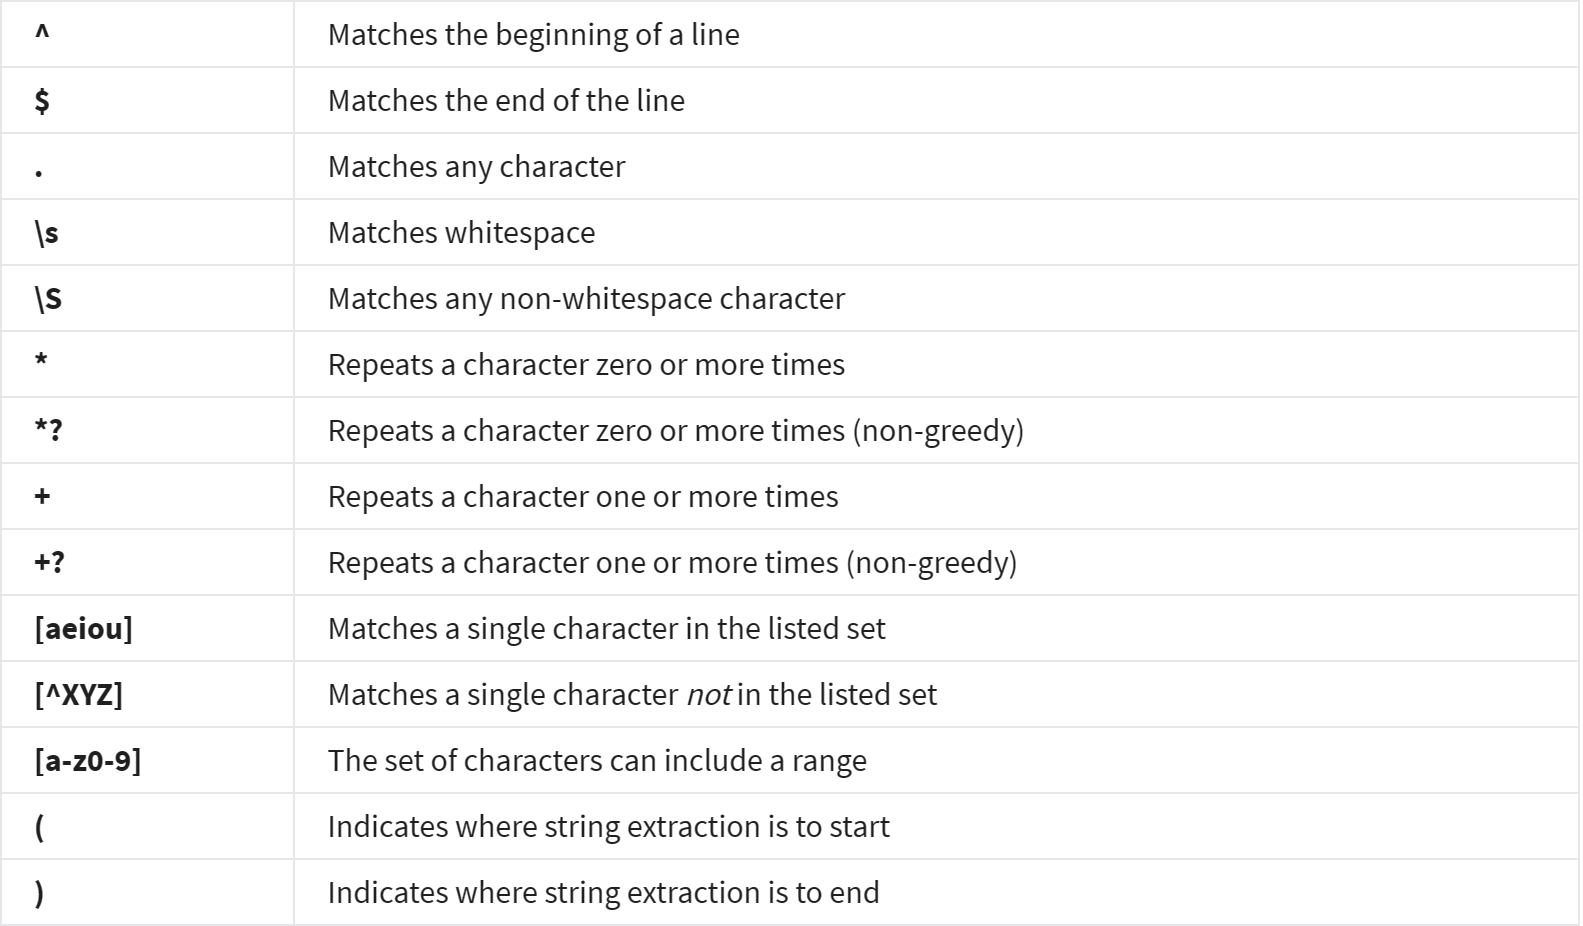

In [ ]:
import re

**Search data**

In [ ]:
hand = open('mbox-short.txt')
for line in hand:
    line = line.rstrip()
    # alternative: if line.find('From: ')
    if line.startswith('From:'):
                       print(line)

In [ ]:
hand = open('mbox-short.txt')
for line in hand:
    line = line.rstrip()
    if re.search('^From:', line):
        print(line)
# re.search() returns True or False 

**Matching and extract data**
- Greedy match: you will get the biggest match -> not greedy with ? 

In [ ]:
x = '2 is not a number but 23 is a better number in this silly game'
print(re.findall('[0-9]+', x))
print(re.findall('n\S+r', x))
# ? - do not be greedy

In [ ]:
x = 'From stephen.marquard@uct.ac.za Sat Jan 5 09:15:21'
# \S - match any non-whitespace; \s - match any whitespace
y = re.findall('\S+@\S+', x)
print(y)

In [ ]:
x = 'From stephen.marquard@uct.ac.za Sat Jan 5 09:15:21'
# \S - match any non-whitespace; \s - match any whitespace
y = re.findall('^From (\S+@\S+)', x)
print(y)
# adding () to do fine-extract 

**The double split pattern**

In [ ]:
line = 'From stephen.marquard@uct.ac.za Sat Jan 5 09:15:21'
words = line.split()
email = words[1]
pieces = email.split('@')
print(pieces[1])

In [ ]:
line = 'From stephen.marquard@uct.ac.za Sat Jan 5 09:15:21'
y_me = re.findall('@(\S*)', line)
print(y_me)
y = re.findall('@([^ 0]*)', line)
print(y)

In [ ]:
x = 'we just received $10 for cookies and the charge is $1.29.'
y = re.findall('\$[0-9.]+', x)
# \ added to $ turn $ into a normal dollar sign
print(y)

In [ ]:
x = 'From: Using the : character'
y = re.findall('^F.+:', x)
print(y)

In [ ]:
import requests
url = 'http://py4e-data.dr-chuck.net/regex_sum_1650011.txt'
resp = requests.get(url)
print(resp.status_code)

In [ ]:
text = resp.text
str_num_list = re.findall('[0-9]+',text)
print(str_num_list)

In [ ]:
import numpy as np
num_list = np.array(str_num_list).astype(int)
print(np.count_nonzero(num_list))
print(np.sum(num_list))

## 2. Build Socket in Python
- The TCP/IP gives us pipes / sockets between applications
- We design applications protocols to make use of these pipes
- HyperText Transfer Protocal(HTTP): invented for the Web to retrieve HTML, images, documents etc.
- Internet standards for all the protocals
- Get request/response cycle 
- Python offers packages for sockets, HTTP, and HTML parsing

**Socket in Python**
- Request get response cycle in python

In [ ]:
import socket
# No meaning but a handle 
mysock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

# reach out host on the port
# the program makes a connection to port 80 on the server www.py4e.com. S
mysock.connect(('data.pr4e.org', 80))
# mysock.connect(host, port)

# prepare for sending HTTP comment and send 
cmd = 'GET http://data.pr4e.org/romeo.txt HTTP/1.0\r\n\r\n'.encode()
# .encode(): receive data in Unicode but send out must in UTF-8
mysock.send(cmd)

# wait, wait, wait ....
# receive the data 
while True:
    data = mysock.recv(512) # receive 512 characters
    if len(data) < 1: # when no data break: the end of file
        break
    print(data.decode(), end='') # print the daat in Unicode 

# close the socket
mysock.close()

**Using the developer console to explore HTTP**
- The GET request/response cycle

In [ ]:
import socket
# No meaning but a handle 
mysock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

# reach out host on the port 
# the program makes a connection to port 80 on the server www.py4e.com. S
mysock.connect(('data.pr4e.org', 80))
# mysock.connect(host, port)

# prepare for sending HTTP comment and send 
cmd = 'GET http://data.pr4e.org/intro-short.txt HTTP/1.0\r\n\r\n'.encode()
# .encode(): receive data in Unicode but send out must in UTF-8
mysock.send(cmd)

# wait, wait, wait ....
# receive the data 
while True:
    data = mysock.recv(512) 
    # receive 512 characters
    if(len(data) < 1): 
    # when no data break: the end of file
        break
    print(data.decode())
    # print the daat in Unicode
          
# close the socket
mysock.close()

## 3. Retrieve Web pages using urllib and BeautifulSoup
- ASCII: American Standard Code for Information Interchange, compatible to UTF-8
- Unicode 
- Mulit-Byte Characters: UTF-8 ( UTF-16/32)) expanded character sets, compatible to ASCII
- Python 2.7.10: byte string (raw and un-decoded) = string and sring <> Unicode string
- Python 3.5.1: byte string <> tring and string = Unicode string-> all the retrieved Bytes needs to be Unicode 
- data.decode(): turn ASCII or UTF-8 into Unicode string into your local Python
- str.encode(): turn Unicode string into Bytes (UTF-8 99%) to  send out to the website
- Using urllib package 

In [ ]:
# Require ASCII using ordinal function

print(ord('I'))
print(ord('L'))
print(ord('o'))
print(ord('v'))
print(ord('e'))
print(ord('Y'))
print(ord('o'))
print(ord('u'))
print(ord('\n')) #new line

**Retrieve data from the Web page**

In [ ]:
import urllib.request, urllib.parse, urllib.error

# get string from url
fhand = urllib.request.urlopen('http://data.pr4e.org/romeo.txt')
## Open up a file
for line in fhand:
    # decode to Unicode
    # returns a copy of the string with both leading and trailing characters removed
    print(line.decode().strip())

**Like a file**

In [ ]:
import urllib.request, urllib.parse, urllib.error

# get string from url
fhand = urllib.request.urlopen('http://data.pr4e.org/romeo.txt')
## Open up a file

counts = dict()
for line in fhand:
    words = line.decode().split()
    for word in words:
        counts[word] = counts.get(word, 0) + 1
        # The get(keyname, value return if none**) method returns the value of the item with the specified key.
print(counts)

**Reading web pages**

In [ ]:
import urllib.request, urllib.parse, urllib.error
fhand = urllib.request.urlopen('http://www.dr-chuck.com/page1.htm')

for line in fhand:
    print(line.decode().strip())

**Following the links!!**

**Parsing Web Pages using BeautifulSoup**
https://www.crummy.com/software/BeautifulSoup/bs4/doc/#:~:text=Beautiful%20Soup%20Documentation%20%C2%B6%201%20Installing%20Beautiful%20Soup,objects.%20...%204%20Navigating%20the%20tree%20%C2%B6%20

In [ ]:
import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup

url = input('Entre - ')
# .read() means read all !!
html = urllib.request.urlopen(url).read()
soup = BeautifulSoup(html, 'html.parser')

# Retrieve all of the anchor tag
tags = soup('a')
for tag in tags:
    print(tag.get('href', None))
    # get the value of the key as 'href'

In [ ]:
# Parsing data from HTTPS
import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup
import ssl 

In [ ]:
import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup

url = 'http://py4e-data.dr-chuck.net/comments_1650013.html'
html = urllib.request.urlopen(url).read()

soup = BeautifulSoup(html,'html.parser')
soup

In [ ]:
span = []
tags = soup('span')
for tag in tags: 
    span.append(tag.contents)

span = np.array(span).flatten().astype(int)
print(span)
print(np.sum(span))

In [ ]:
# To run this, download the BeautifulSoup zip file
# http://www.py4e.com/code3/bs4.zip
# and unzip it in the same directory as this file

import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup
import ssl

# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

url = input('Enter - ')
html = urllib.request.urlopen(url, context=ctx).read()
soup = BeautifulSoup(html, 'html.parser')

# Retrieve all of the anchor tags
tags = soup('a')
for tag in tags:
    print(tag.get('href', None))

In [ ]:
import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup

resp = urllib.request.urlopen('http://py4e-data.dr-chuck.net/known_by_Kayda.html').read()
soup = BeautifulSoup(resp, 'html.parser')

tags = soup('a')
links = []
for tag in tags:
    links.append(tag.get('href',None))
print(links[17])

In [ ]:
import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup

url_page = input('Entre url: ')
count = input('Entre count: ')
position = input('Entre position: ')

for href in range(int(count)):
    resp = urllib.request.urlopen(url_page).read()
    soup = BeautifulSoup(resp, 'html.parser')
    tags = soup('a')
    links = []
    for tag in tags:
        links.append(tag.get('href', None))
    url_page = links[int(position) - 1]
print('Retrieved link:', url_page)

## 4. Intermediate protocal languages
- An agreed on intermediate wire protocal in two commonly used serialized formats: XML and JSON
- XML as a tree or as a path
- XML Schema
- Parsing XLM
- JSON parsing 
- API

### 4.1 XML

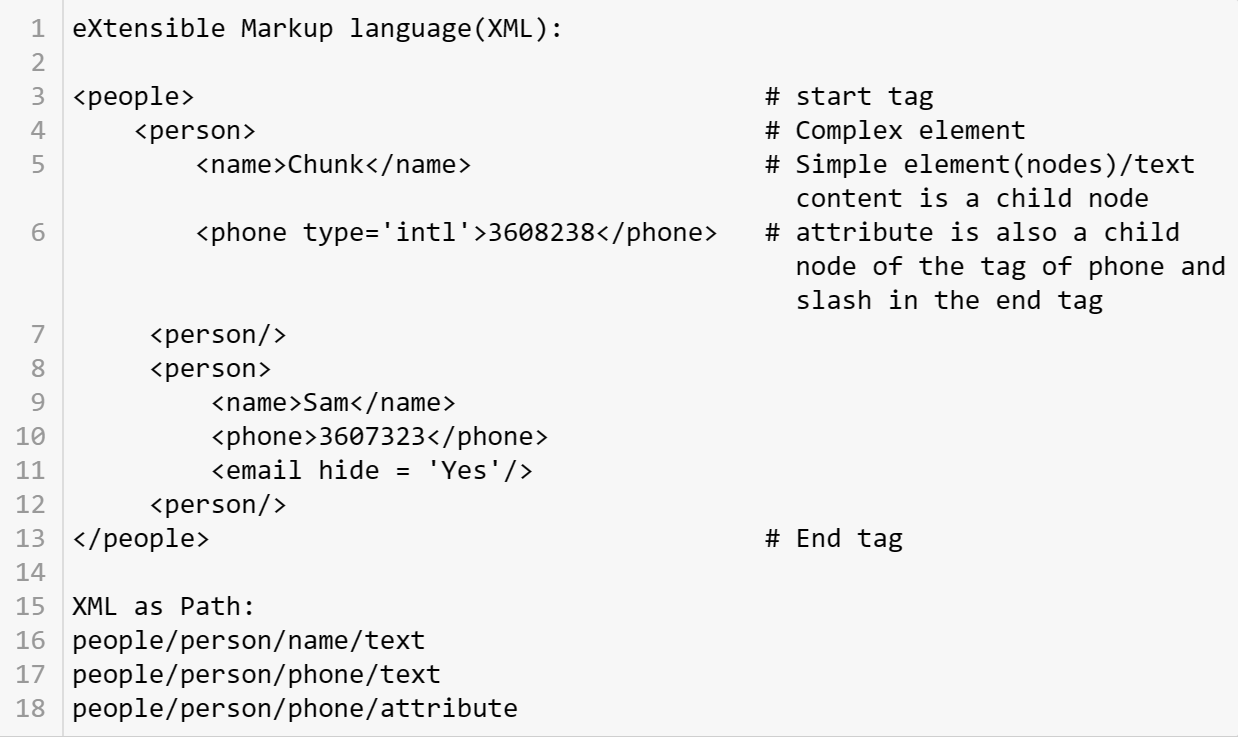

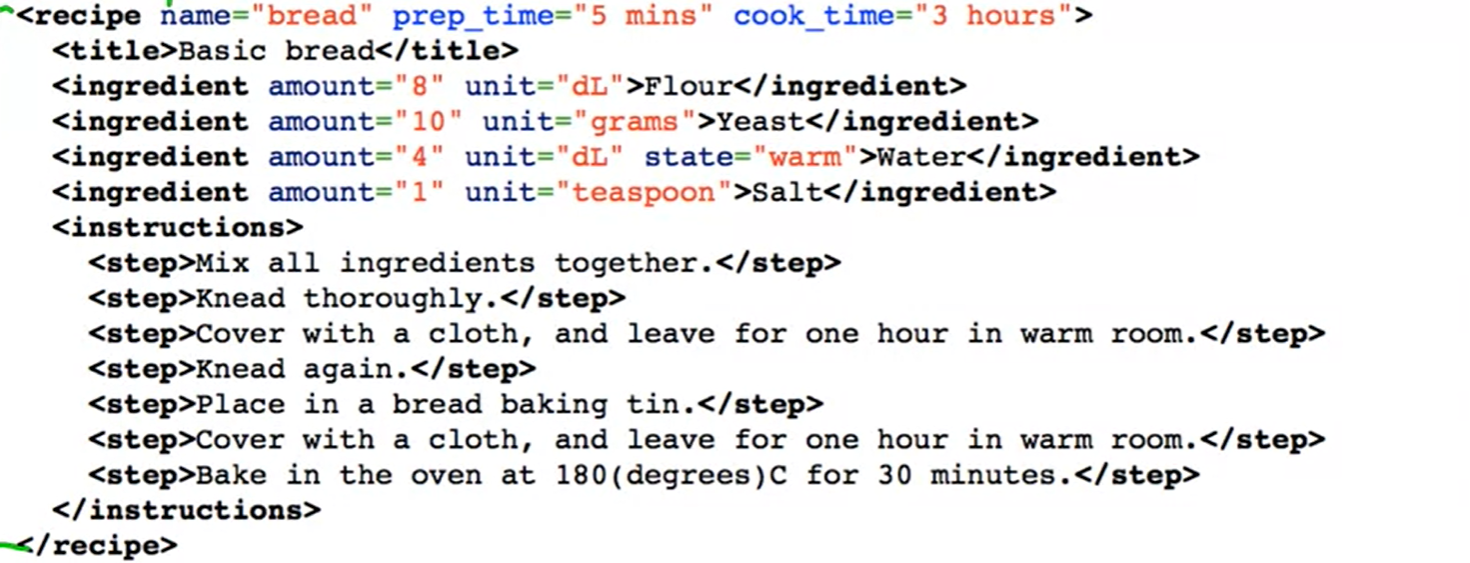

**XML Schema**
<br>
*Describe a "contract" as to what is acceptable XML.*

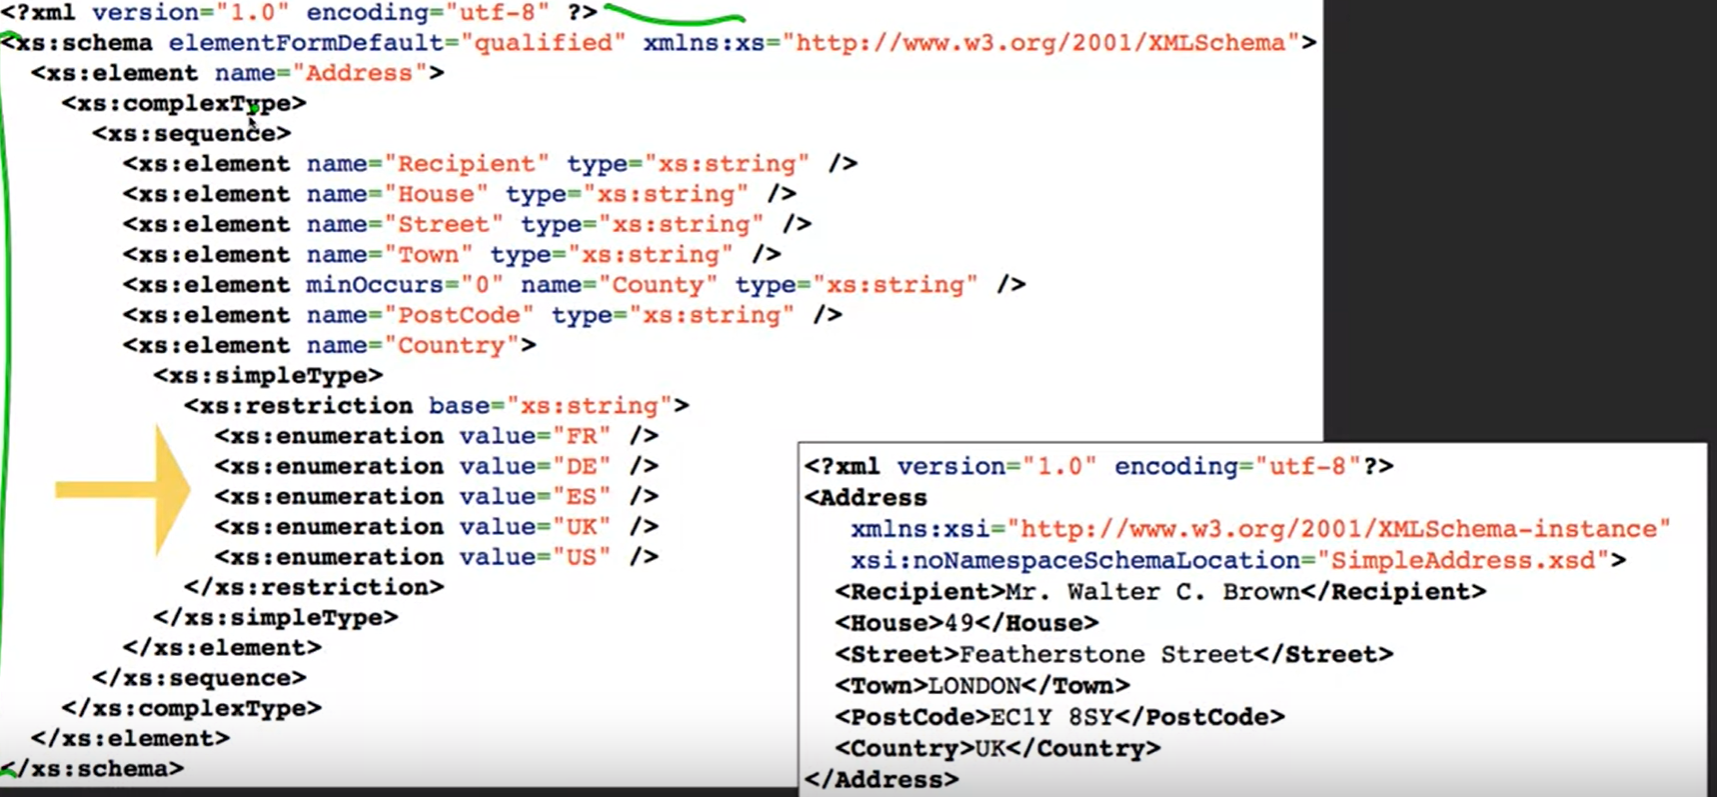

**XML parsing**
<br>
*Loop a list of trees*

In [ ]:
# import the library 
import xml.etree.ElementTree as ET

# triple quote string in python is a potential multi-line string
# XML format
data = '''<person>
  <name>Chunk</name>
  <phone type = "intl">
     +1 734 303 4456
     </phone>
     <email hide ="yes"/>
  </person>'''

# pull the string data to get an ET object 
# fromsting - turn string into an ET tree object
# this step can blow up if you do not have slash to constructure the tree
tree = ET.fromstring(data)
# In the tree to find tag of name, pull out the text
print('Name:', tree.find('name').text)
# IN the tree to find tag of email, to get the content of attribute
print('Attr:', tree.find('email').get('hide'))

In [ ]:
# Mutiple parent tags

# import the library 
import xml.etree.ElementTree as ET
# XML format
input = '''<stuff>
  <users>
     <user x = "2">
         <id>001</id>
         <name>Chunk</name>
     </user>
     <user x = "7">
         <id>009</id>
         <name>Brent</name>
     </user>
  </users>
</stuff>'''

# stuff is an ET object 
stuff = ET.fromstring(input)
# .findall method to find multiple "user" tags under the node of "users"
# all the "user" nodes combine become a list - lst
lst = stuff.findall('users/user')
print(lst)
# Check the length of the list - count the "user" elements in the list 
print('User count:', len(lst))

# loop all the list of "user"
for user in lst:
    print('Name', user.find('name').text)
    print('Id', user.find('id').text)
    print('Attr', user.get('x'))

In [ ]:
import urllib.request, urllib.parse, urllib.error
import xml.etree.ElementTree as ET
import ssl

api_key = False
# If you have a Google Places API key, enter it here
# api_key = 'AIzaSy___IDByT70'
# https://developers.google.com/maps/documentation/geocoding/intro

if api_key is False:
    api_key = 42
    serviceurl = 'http://py4e-data.dr-chuck.net/xml?'
else :
    serviceurl = 'https://maps.googleapis.com/maps/api/geocode/xml?'

# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

while True:
    address = input('Enter location: ')
    if len(address) < 1: break

    parms = dict()
    parms['address'] = address
    if api_key is not False: parms['key'] = api_key
    url = serviceurl + urllib.parse.urlencode(parms)
    print('Retrieving', url)
    uh = urllib.request.urlopen(url, context=ctx)

    data = uh.read()
    print('Retrieved', len(data), 'characters')
    print(data.decode())
    tree = ET.fromstring(data)

    results = tree.findall('result')
    lat = results[0].find('geometry').find('location').find('lat').text
    lng = results[0].find('geometry').find('location').find('lng').text
    location = results[0].find('formatted_address').text

    print('lat', lat, 'lng', lng)
    print(location)

**Using BeautifulSoup to parse XML**

In [ ]:
import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup
import numpy as np

xml_page = urllib.request.urlopen('http://py4e-data.dr-chuck.net/comments_1650015.xml?').read()
soup = BeautifulSoup(xml_page, 'xml')
counts = soup.find_all('count')

num_list = []
for count in counts:
    num_list.append(count.text)
num_array=np.array(num_list).astype(int)
print(len(num_list))
print(sum(num_array))

**Using ElementTree to parse XML**

In [ ]:
import xml.etree.ElementTree as ET
import urllib.request, urllib.parse, urllib.error
import numpy as np

xml_page = urllib.request.urlopen('http://py4e-data.dr-chuck.net/comments_1650015.xml?').read()
stuff = ET.fromstring(xml_page)
#.// to ignore the nonsense
lst = stuff.findall('.//comments/comment')

count = []
for comment in lst:
    count.append(comment.find('count').text)
count = np.array(count).astype(int)
print(len(count))
print(sum(count))


### 4.2 JavaScript Object Notation (JSON)
- JSON represents data as nested "lists" and "dictionaries"
- JSON object in Python is either a dictionary or a list: json.loads(data)

In [ ]:
import json
data = '''{
"name": "Chuck",
"phone":{
"type": "intl",
"number":"+1 734 303 4456"
},
"email":{
"hide":"yes"
}
}'''

# Json object in python is a python dictionary
info = json.loads(data)
print(info)
print(type(info))
print('Name:',info['name'])
print('Hide:',info["email"]["hide"])

In [ ]:
import pandas as pd
df = pd.DataFrame(info)
df

In [ ]:
import json
lst = '''[
{"id": "001", "x":"2", "name":"Chuck"},
{"id": "009", "x":"7", "name":"Sam"}
]'''

# Json object in python is a python dictionary
info = json.loads(lst)
print(info)
print(type(info))
print('User count:', len(info))

for item in info:
    print('Name:',item['name'])
    print('Id:',item["id"])
    print('Attr:',item['x'])

# Construct a dataframe
df_2 = pd.DataFrame(info)
print(df_2)

In [ ]:
import json 
import urllib.request, urllib.parse, urllib.error

input = 'http://py4e-data.dr-chuck.net/comments_1650016.json'
data = urllib.request.urlopen(input).read().decode()
js = json.loads(data)
print(json.dumps(js, indent = 4))

lst = []
for item in js['comments']: 
    lst.append(item['count'])
    
print(len(lst))    
print(sum(lst))

### 4.3 API
- Service oriented application: services publish the 'rules' applications must follow to make use of the service(API)- Using Application Programming Interfaces(API) to communicate with other applicaitons 
- API security and Rate Limit: 
 - Google
 - Twitter

In [ ]:
import urllib.request, urllib.parse, urllib.error
import json
import ssl

api_key = False
# If you have a Google Places API key, enter it here
# api_key = 'AIzaSy___IDByT70'
# https://developers.google.com/maps/documentation/geocoding/intro

if api_key is False:
    api_key = 42
    serviceurl = 'http://py4e-data.dr-chuck.net/json?'
else :
    serviceurl = 'https://maps.googleapis.com/maps/api/geocode/json?'

# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

while True:
    address = input('Enter location: ')
    if len(address) < 1: break

    parms = dict()
    parms['address'] = address
    if api_key is not False: parms['key'] = api_key
    url = serviceurl + urllib.parse.urlencode(parms)

    print('Retrieving', url)
    uh = urllib.request.urlopen(url, context=ctx)
    data = uh.read().decode()
    print('Retrieved', len(data), 'characters')

    try:
        js = json.loads(data)
    except:
        js = None

    if not js or 'status' not in js or js['status'] != 'OK':
        print('==== Failure To Retrieve ====')
        print(data)
        continue

    print(json.dumps(js, indent=4))

    lat = js['results'][0]['geometry']['location']['lat']
    lng = js['results'][0]['geometry']['location']['lng']
    print('lat', lat, 'lng', lng)
    location = js['results'][0]['formatted_address']
    place_id = js['results'][0]['place_id']
    print(location)
    print(place_id)

Enter location: University of Hawaii
Retrieving http://py4e-data.dr-chuck.net/json?address=University+of+Hawaii&key=42
Retrieved 2470 characters
{
    "results": [
        {
            "address_components": [
                {
                    "long_name": "Spalding Hall",
                    "short_name": "Spalding Hall",
                    "types": [
                        "premise"
                    ]
                },
                {
                    "long_name": "2540",
                    "short_name": "2540",
                    "types": [
                        "street_number"
                    ]
                },
                {
                    "long_name": "Maile Way",
                    "short_name": "Maile Way",
                    "types": [
                        "route"
                    ]
                },
                {
                    "long_name": "Manoa",
                    "short_name": "Manoa",
                    "types": [
   

In [ ]:
import urllib.request, urllib.parse, urllib.error
import json

# Note that Google is increasingly requiring keys
# for this API
serviceurl = 'http://py4e-data.dr-chuck.net/json?'
    
while True:
    address = input('Enter location: ')
    if len(address) < 1: break
    
    url = serviceurl + urllib.parse.urlencode(
       {'address': address})
    
    print('retriving',url)
    data = urllib.request.urlopen(url).read().decode()
    print('Retrieved', len(data),'characters')
    
    try:
        js = json.loads(data)
    except: 
        js = None
    
    # check whether json file is correctly downloaded
    if not js or 'status' not in js or js['status'] != 'OK':
        print('==== Failure To Retrieve ====')
        print(data)
        continue
    
    # json.dumps changed to JSON format 
    print(json.dumps(js, indent = 4))
    
    lat = js['results'][0]['geometry']['location']['lat']
    lng = js['results'][0]['geometry']['location']['lng']
    print('lat', lat, 'lng', lng)
    location = js['results'][0]['formatted_address']
    print(location)

Enter location: University of Hawaii
retriving http://py4e-data.dr-chuck.net/json?address=University+of+Hawaii
Retrieved 67 characters
==== Failure To Retrieve ====
Missing/incorrect key= parameter (it is an easy number to guess)...


**Reference material: Twitter API**
<br>
*To make use of these programs you will need to have a Twitter account, and authorize your Python code as an application, set up a key, secret, token and token secret.*

In [ ]:
import urllib.request, urllib.parse, urllib.error
import oauth
import hidden

# https://apps.twitter.com/
# Create App and get the four strings, put them in hidden.py

def augment(url, parameters):
    secrets = hidden.oauth()
    consumer = oauth.OAuthConsumer(secrets['consumer_key'],
                                   secrets['consumer_secret'])
    token = oauth.OAuthToken(secrets['token_key'], secrets['token_secret'])

    oauth_request = oauth.OAuthRequest.from_consumer_and_token(consumer,
                    token=token, http_method='GET', http_url=url,
                    parameters=parameters)
    oauth_request.sign_request(oauth.OAuthSignatureMethod_HMAC_SHA1(),
                               consumer, token)
    return oauth_request.to_url()


def test_me():
    print('* Calling Twitter...')
    url = augment('https://api.twitter.com/1.1/statuses/user_timeline.json',
                  {'screen_name': 'drchuck', 'count': '2'})
    print(url)
    connection = urllib.request.urlopen(url)
    data = connection.read()
    print(data)
    headers = dict(connection.getheaders())
    print(headers)

In [ ]:
# hidden file
# Keep this file separate

# https://apps.twitter.com/
# Create new App and get the four strings

def oauth():
    return {"consumer_key": "h7Lu...Ng",
            "consumer_secret": "dNKenAC3New...mmn7Q",
            "token_key": "10185562-eibxCp9n2...P4GEQQOSGI",
            "token_secret": "H0ycCFemmC4wyf1...qoIpBo"}

*For the programs we run with Twitter, we hide all the complexity in the files oauth.py and twurl.py. We simply set the secrets in hidden.py and then send the desired URL to the twurl.augment() function and the library code adds all the necessary parameters to the URL for us.*

*This program retrieves the timeline for a particular Twitter user and returns it to us in JSON format in a string. We simply print the first 250 characters of the string:*

In [ ]:
import urllib.request, urllib.parse, urllib.error
import twurl
import ssl

# https://apps.twitter.com/
# Create App and get the four strings, put them in hidden.py

TWITTER_URL = 'https://api.twitter.com/1.1/statuses/user_timeline.json'

# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

while True:
    print('')
    acct = input('Enter Twitter Account:')
    if (len(acct) < 1): break
    url = twurl.augment(TWITTER_URL,
                        {'screen_name': acct, 'count': '2'})
    print('Retrieving', url)
    connection = urllib.request.urlopen(url, context=ctx)
    data = connection.read().decode()
    print(data[:250])
    headers = dict(connection.getheaders())
    # print headers
    print('Remaining', headers['x-rate-limit-remaining'])

# Code: http://www.py4e.com/code3/twitter1.py
When the program runs it produces the following output:

Enter Twitter Account:drchuck
Retrieving https://api.twitter.com/1.1/ ...
[{"created_at":"Sat Sep 28 17:30:25 +0000 2013","
id":384007200990982144,"id_str":"384007200990982144",
"text":"RT @fixpert: See how the Dutch handle traffic
intersections: http:\/\/t.co\/tIiVWtEhj4\n#brilliant",
"source":"web","truncated":false,"in_rep
Remaining 178

Enter Twitter Account:fixpert
Retrieving https://api.twitter.com/1.1/ ...
[{"created_at":"Sat Sep 28 18:03:56 +0000 2013",
"id":384015634108919808,"id_str":"384015634108919808",
"text":"3 months after my freak bocce ball accident,
my wedding ring fits again! :)\n\nhttps:\/\/t.co\/2XmHPx7kgX",
"source":"web","truncated":false,
Remaining 177

Enter Twitter Account:

*In the following example, we retrieve a user’s Twitter friends, parse the returned JSON, and extract some of the information about the friends. We also dump the JSON after parsing and “pretty-print” it with an indent of four characters to allow us to pore through the data when we want to extract more fields.*

In [ ]:
import urllib.request, urllib.parse, urllib.error
import twurl
import json
import ssl

# https://apps.twitter.com/
# Create App and get the four strings, put them in hidden.py

TWITTER_URL = 'https://api.twitter.com/1.1/friends/list.json'

# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

while True:
    print('')
    acct = input('Enter Twitter Account:')
    if (len(acct) < 1): break
    url = twurl.augment(TWITTER_URL,
                        {'screen_name': acct, 'count': '5'})
    print('Retrieving', url)
    connection = urllib.request.urlopen(url, context=ctx)
    data = connection.read().decode()

    js = json.loads(data)
    print(json.dumps(js, indent=2))

    headers = dict(connection.getheaders())
    print('Remaining', headers['x-rate-limit-remaining'])

    for u in js['users']:
        print(u['screen_name'])
        if 'status' not in u:
            print('   * No status found')
            continue
        s = u['status']['text']
        print('  ', s[:50])

# Code: http://www.py4e.com/code3/twitter2.py